In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2023-09-13 16:55:33.023202: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2.12.1


In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
print (f"Length of train_images = {len(train_images)}, length of test_images = {len(test_images)}.")
print (f"The labels we will be dealing with are {np.unique(train_labels)}.")

Length of train_images = 60000, length of test_images = 10000.
The labels we will be dealing with are [0 1 2 3 4 5 6 7 8 9].


In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
labels = list(np.unique(train_labels))
label2name = dict(zip(labels, class_names))

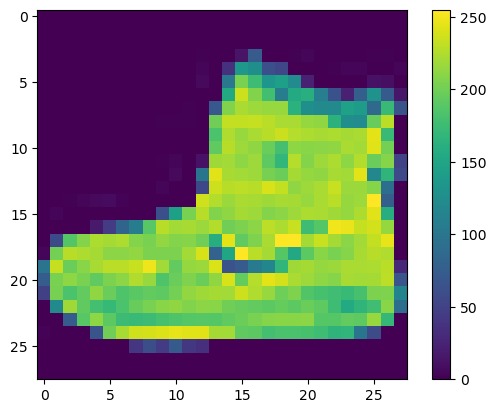

In [5]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [8]:
train_images = train_images / 255.0
test_images  = test_images  / 255.0

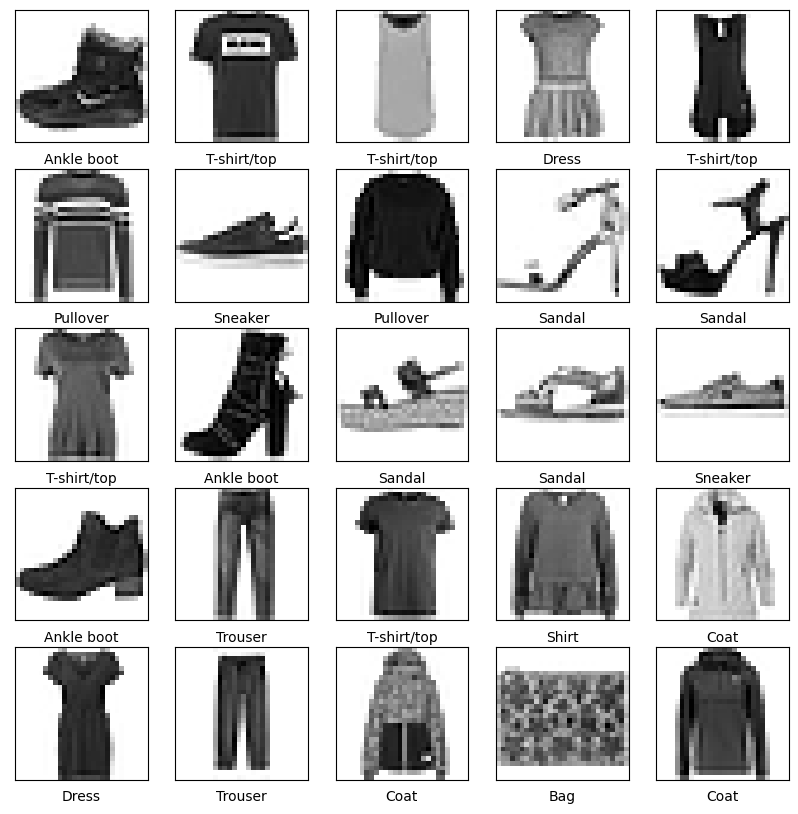

In [10]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [11]:
# build the model, set up the layers

In [15]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [16]:
model.compile (optimizer='adam',
               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
               metrics=['accuracy'])

In [21]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3616 - accuracy: 0.8722
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3593 - accuracy: 0.8727
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3570 - accuracy: 0.8743
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3554 - accuracy: 0.8745
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3527 - accuracy: 0.8754
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3509 - accuracy: 0.8764
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3490 - accuracy: 0.8762
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3463 - accuracy: 0.8770
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3451 - accuracy: 0.8781
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.343

In [22]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

313/313 - 0s - loss: 0.3927 - accuracy: 0.8584 - 208ms/epoch - 666us/step


In [23]:
print(f'Test accuracy: {test_acc}')

Test accuracy: 0.8583999872207642


In [24]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [25]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 0s 595us/step


In [26]:
predictions[0]

array([8.3482753e-08, 8.5311275e-10, 7.9273605e-08, 9.7776990e-07,
       3.8890125e-06, 7.9266779e-02, 1.3620229e-05, 5.0805770e-02,
       2.0921968e-03, 8.6781657e-01], dtype=float32)

In [28]:
label2name[np.argmax(predictions[0])]

'Ankle boot'

In [31]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

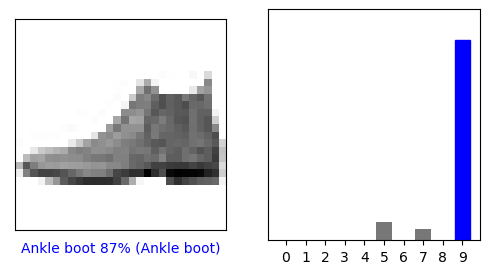

In [32]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

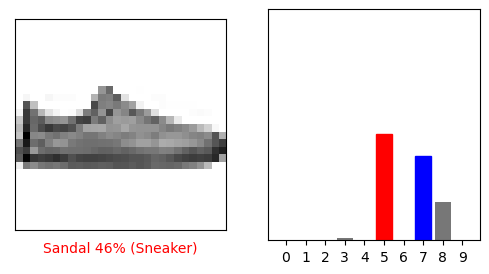

In [33]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

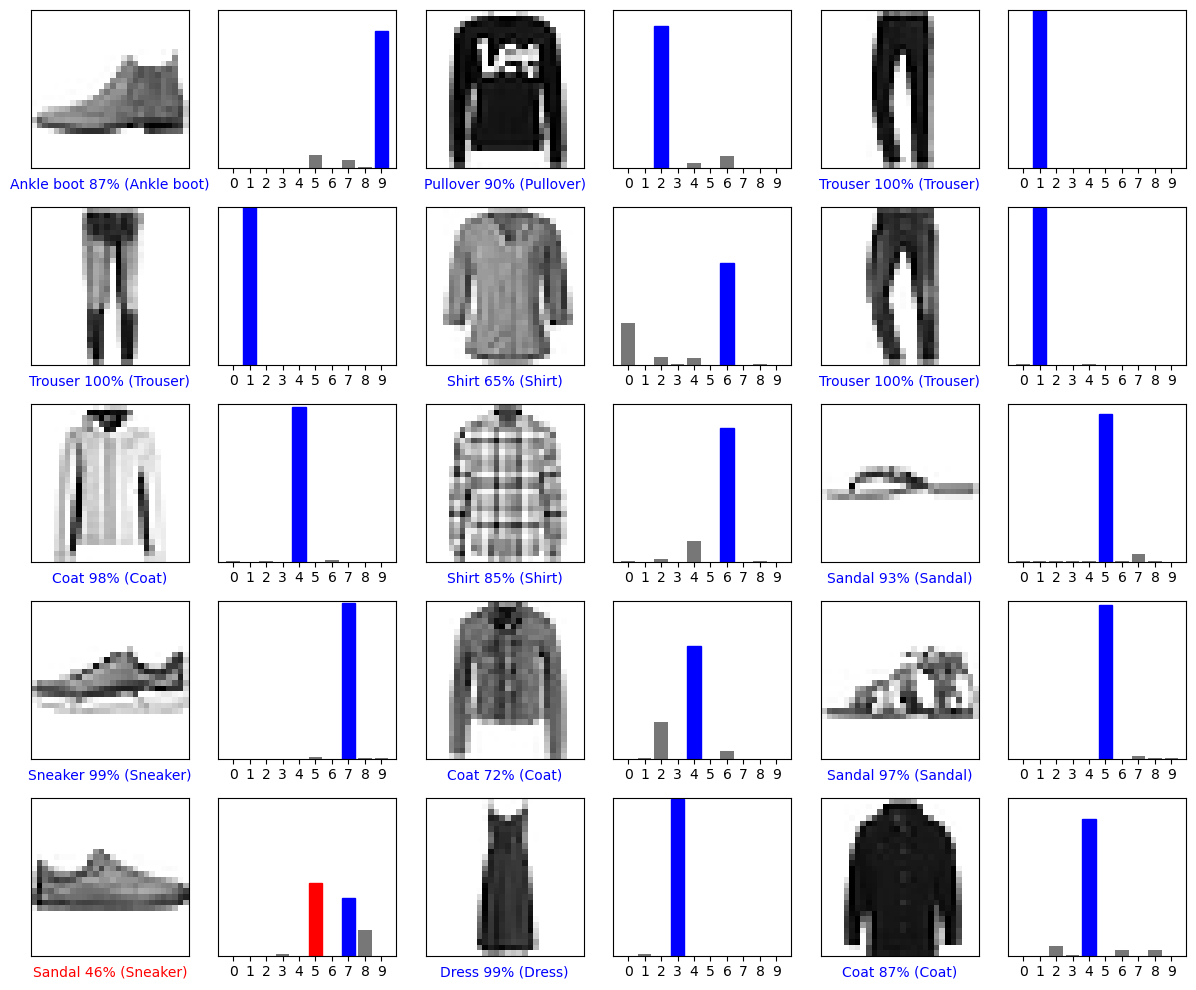

In [34]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()